In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 33.8MB/s]


In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

484/484 [==============================] - 13s 27ms/step - loss: 1.1860 - accuracy: 0.7960
Epoch 92/100
484/484 [==============================] - 13s 27ms/step - loss: 1.1768 - accuracy: 0.7960
Epoch 93/100
484/484 [==============================] - 13s 26ms/step - loss: 1.1566 - accuracy: 0.8002
Epoch 94/100
484/484 [==============================] - 13s 27ms/step - loss: 1.1522 - accuracy: 0.7986
Epoch 95/100
484/484 [==============================] - 13s 27ms/step - loss: 1.1350 - accuracy: 0.8040
Epoch 96/100
484/484 [==============================] - 13s 27ms/step - loss: 1.1343 - accuracy: 0.8010
Epoch 97/100
484/484 [==============================] - 13s 27ms/step - loss: 1.1331 - accuracy: 0.8023
Epoch 98/100
484/484 [==============================] - 13s 27ms/step - loss: 1.1109 - accuracy: 0.8061
Epoch 99/100
484/484 [==============================] - 13s 27ms/step - loss: 1.1120 - accuracy: 0.8036
Epoch 100/100
484/484 [==============================] - 13s 27ms/step - loss

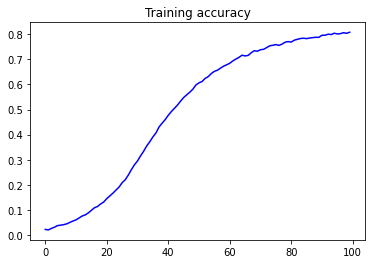

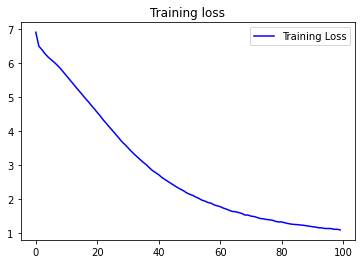

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [6]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predict_x = model.predict(token_list, verbose=0)
	predicted = np.argmax(predict_x, axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope thy praise and thee die resort lie can resort be lie doth true all ' doth dwell more eye do say his tomb thee convertest dead miss'd greater hand held hate sang seen fight clears cross'd clears sad gems faith seen back back back another needing date light dead seen resort light seen twain fight night out dead burn'd sad gems faith seen weeds up miss'd remain grow weeds night quite sadly fired fitted out when indeed convertest seen back more strong shaken rage skill affords warm'd back clears days bearing told we worth so date days live blushing make
